In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [39]:
#reading the data and excluding the data over the oceans
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')
ds_tmp = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_t2m.nc')
#ds_tmp = ds_tmp.where(nc_inv.lsm > 0.5)
ds_p = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')
#ds_p = ds_p.where(nc_inv.lsm > 0.5)

In [40]:
ds_p.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 120)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2009-01-01 2009-02-01 ... 2018-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-18 09:30:18 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [42]:
#temperature data
t2m = ds_tmp.t2m

# monthly average temperature
t_month_avg = t2m.groupby('time.month').mean()
t_min = t_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics = t_min.where(t_min >= 18)
tropics = tropics.where(nc_inv.lsm > 0.5)

#last ten years
ds_tmp_10 = t2m.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
# monthly average temperature
t10_month_avg = ds_tmp_10.groupby('time.month').mean()
t10_min = t10_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics10 = t10_min.where(t_min >= 18)
tropics10 = tropics10.where(nc_inv.lsm > 0.5)


#precipitation data
p_mon_avg = ds_p.tp.groupby('time.month').mean() * 1000 * 30
p_min = p_mon_avg.min(dim = 'month')

#last ten years
ds_p_10 = ds_p.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
p10_mon_avg = ds_p_10.groupby('time.month').mean() * 1000 * 30
p10_min = p10_mon_avg.min(dim = 'month')


In [37]:
ds_tmp_10 = t2m.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
ds_tmp_10

<xarray.DataArray 't2m' (time: 0, latitude: 241, longitude: 480)>
array([], shape=(0, 241, 480), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Attributes:
    units:      K
    long_name:  2 metre temperature

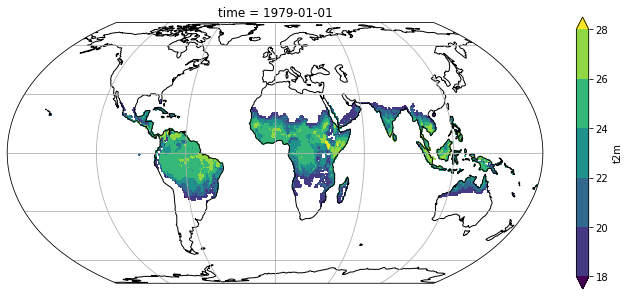

In [43]:
#plotting the tropics of the last 10 years
#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#t_min.plot(ax = ax, transform = ccrs.PlateCarree())
tropics10.plot(ax = ax, transform = ccrs.PlateCarree(), levels = [18, 20, 22, 24, 26, 28])
#tropics.plot.contour(ax = ax, transform = ccrs.PlateCarree(), levels = 1, colors = 'magenta')
ax.coastlines(); ax.gridlines();

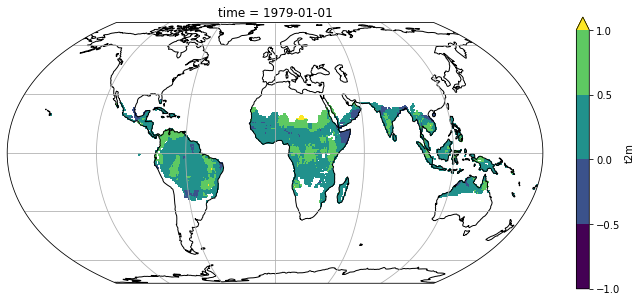

In [49]:
#plotting the difference in the tropics temperature
trop_diff = tropics10-tropics

ax = plt.axes(projection = ccrs.EqualEarth())
trop_diff.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'viridis', levels = [-1, -0.5, 0, 0.5, 1])
ax.coastlines(); ax.gridlines();